mengimpor library yang diperlukan seperti pandas dan numpy, serta melakukan mount drive untuk mengakses file data.

In [41]:
import pandas as pd
import numpy as np

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Kode di bawah ini membaca data dari file CSV ke dalam DataFrame menggunakan pandas. Nama kolom ditentukan melalui parameter names.


---


process.b1.capacity

Tipe: Integer

Deskripsi: Kapasitas (jumlah maksimum produk untuk dimenangkan) dari Penawar 1.


---


process.b2.capacity

Tipe: Integer

Deskripsi: Kapasitas (jumlah maksimum produk untuk dimenangkan) dari Penawar 2.


---


process.b3.capacity

Tipe: Integer

Deskripsi: Kapasitas (jumlah maksimum produk untuk dimenangkan) dari Penawar 3.


---


process.b4.capacity

Tipe: Integer

Deskripsi: Kapasitas (jumlah maksimum produk untuk dimenangkan) dari Penawar 4.


---


property.price

Tipe: Integer

Deskripsi: Harga yang saat ini diverifikasi.


---


property.product

Tipe: Integer

Deskripsi: Produk yang saat ini diverifikasi.


---


property.winner

Tipe: Integer

Deskripsi: Penawar yang saat ini diverifikasi sebagai pemenang produk (0 jika hanya harga yang diverifikasi).


---


verification.result

Tipe: Kategorikal

Deskripsi: Hasil verifikasi biner - apakah hasil yang diverifikasi mungkin?


---


verification.time

Tipe: Continuous

Deskripsi: Waktu prosedur verifikasi berlangsung.


---


Setiap fitur memiliki tipe data yang sesuai (Integer atau Categorical) dan berisi informasi tentang proses lelang atau verifikasi produk. verification.result merupakan target yang merupakan hasil biner dari verifikasi, dan verification.time adalah waktu yang diperlukan untuk prosedur verifikasi.

In [46]:
names = ["process.b1.capacity", "process.b2.capacity", "process.b3.capacity", "process.b4.capacity", "property.price", "property.product", "property.winner", "verification.result", "verification.time"]
dataset = pd.read_csv ('/content/drive/MyDrive/ML/auction+verification.csv', names=names, header=0)

Menampilkan bentuk (shape) dari DataFrame dataset, yaitu jumlah baris dan kolom

In [47]:
print (dataset.shape)

(2043, 9)


Menampilkan 20 baris pertama dari DataFrame dataset. Berguna untuk melihat contoh data awal dan memahami struktur kolom-kolomnya.

In [48]:
print (dataset.head(20))

    process.b1.capacity  process.b2.capacity  process.b3.capacity  \
0                     0                    0                    2   
1                     0                    0                    2   
2                     0                    0                    2   
3                     0                    0                    2   
4                     0                    0                    2   
5                     0                    0                    2   
6                     0                    0                    2   
7                     0                    0                    2   
8                     0                    0                    2   
9                     0                    0                    2   
10                    0                    0                    2   
11                    0                    0                    2   
12                    0                    0                    2   
13                    0           

Menggunakan operasi groupby untuk mengelompokkan data berdasarkan kolom 'verification.time', kemudian menghitung ukuran (jumlah baris) di setiap kelompok. Berguna untuk melihat distribusi data berdasarkan waktu verifikasi.

In [34]:
print (dataset.groupby('verification.time').size())

verification.time
77.916667       1
78.000000       1
78.150000       1
78.791667       1
78.840000       1
               ..
40673.104167    1
41602.166667    1
42828.416667    1
43504.250000    1
44130.520833    1
Length: 2039, dtype: int64


Menampilkan tipe data dari setiap kolom dalam DataFrame dataset. Berguna untuk memahami apakah tipe data setiap kolom sesuai dengan yang diharapkan.

In [42]:
print(dataset.dtypes)

process.b1.capacity      int64
process.b2.capacity      int64
process.b3.capacity      int64
process.b4.capacity      int64
property.price           int64
property.product         int64
property.winner          int64
verification.result       bool
verification.time      float64
dtype: object


Menampilkan statistik deskriptif seperti rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum dari setiap kolom numerik dalam DataFrame dataset. Berguna untuk mendapatkan gambaran singkat tentang distribusi dan variasi data.

In [35]:
print (dataset.describe())

       process.b1.capacity  process.b2.capacity  process.b3.capacity  \
count          2043.000000          2043.000000          2043.000000   
mean              1.000000             2.093979             1.883994   
std               0.816696             0.811269             0.320310   
min               0.000000             0.000000             1.000000   
25%               0.000000             1.000000             2.000000   
50%               1.000000             2.000000             2.000000   
75%               2.000000             3.000000             2.000000   
max               2.000000             3.000000             2.000000   

       process.b4.capacity  property.price  property.product  property.winner  \
count          2043.000000     2043.000000       2043.000000      2043.000000   
mean              0.587861       71.473324          3.252080         0.455213   
std               0.492340        8.048740          1.804225         1.062828   
min               0.000000 

Kode di bawah ini menampilkan box plot untuk masing-masing kolom, memberikan gambaran distribusi data. box plot (box-and-whisker plot) adalah jenis grafik statistik yang memberikan gambaran visual tentang distribusi data dan sejumlah statistik deskriptif utama

In [36]:
import matplotlib.pyplot as plt

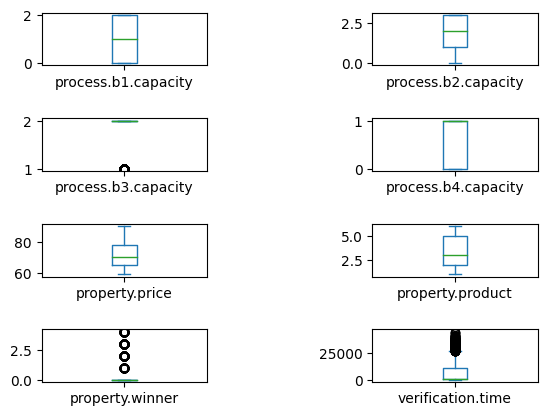

In [37]:
dataset.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False)
plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

Pada bagian ini, dilakukan visualisasi data menggunakan histogram untuk melihat distribusi frekuensi data. visualisasi data menggunakan histogram adalah metode untuk menggambarkan distribusi frekuensi data. Histogram merupakan grafik batang yang memperlihatkan sebaran data ke dalam kategori atau interval tertentu. Setiap batang pada histogram merepresentasikan frekuensi atau jumlah kemunculan data dalam interval tersebut.

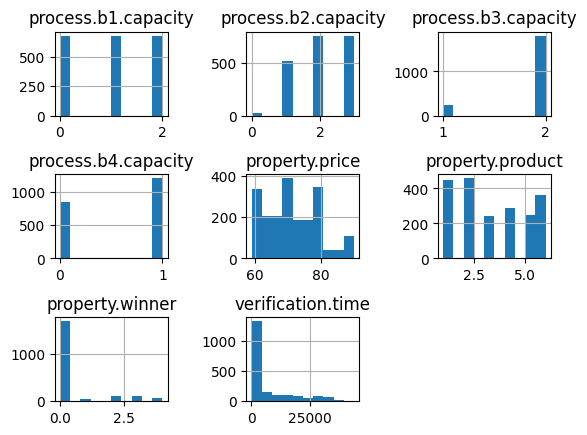

In [38]:
dataset.hist()
plt.subplots_adjust(hspace=0.7, wspace=0.7)
plt.show()

Terakhir, dilakukan plotting scatter matrix untuk melihat hubungan antar variabel numerik dalam data. Plotting scatter matrix adalah teknik visualisasi yang berguna untuk memahami hubungan antar variabel numerik dalam satu set data. Scatter matrix menampilkan scatter plot untuk setiap pasangan variabel numerik yang ada dalam data. Setiap sel pada matriks scatter plot menunjukkan hubungan antara dua variabel.

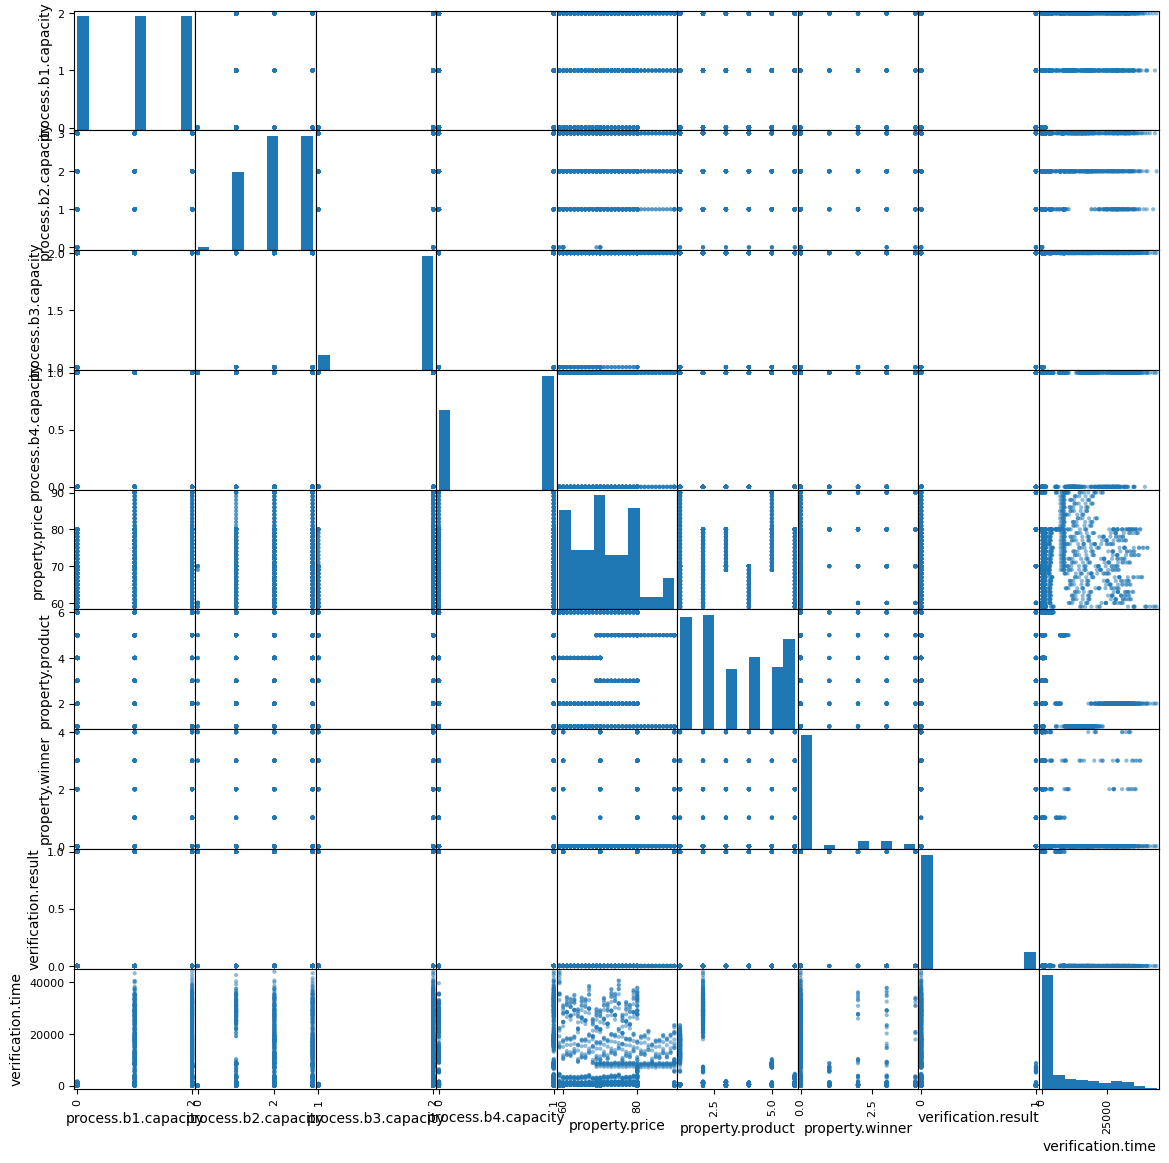

In [53]:
import pandas
from pandas.plotting import scatter_matrix

#untuk mengonversi tipe data semua kolom dalam dataset menjadi tipe data integer.
#dalam kasus ini merubah verification.result menjadi bilangan integer 0 untuk false dan 1 untuk true
dataset_numeric = dataset.astype(int)

scatter_matrix(dataset_numeric, figsize=(14, 14))

plt.show()

Kode tersebut untuk memahami struktur data, distribusi, dan hubungan antar variabel melalui visualisasi. Box plot dan histogram memberikan wawasan tentang sebaran dan frekuensi data, sedangkan scatter matrix memungkinkan kita melihat korelasi antar variabel numerik.